EX:8 - Prescriptive Analysis on sales data using R programming


Call:
lm(formula = sales ~ month_numeric)

Residuals:
    Min      1Q  Median      3Q     Max 
-422963 -344003   -3239  150188 1101533 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)     574174     269939   2.127   0.0593 .
month_numeric    40289      36678   1.098   0.2977  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 438600 on 10 degrees of freedom
Multiple R-squared:  0.1077,	Adjusted R-squared:  0.01844 
F-statistic: 1.207 on 1 and 10 DF,  p-value: 0.2977


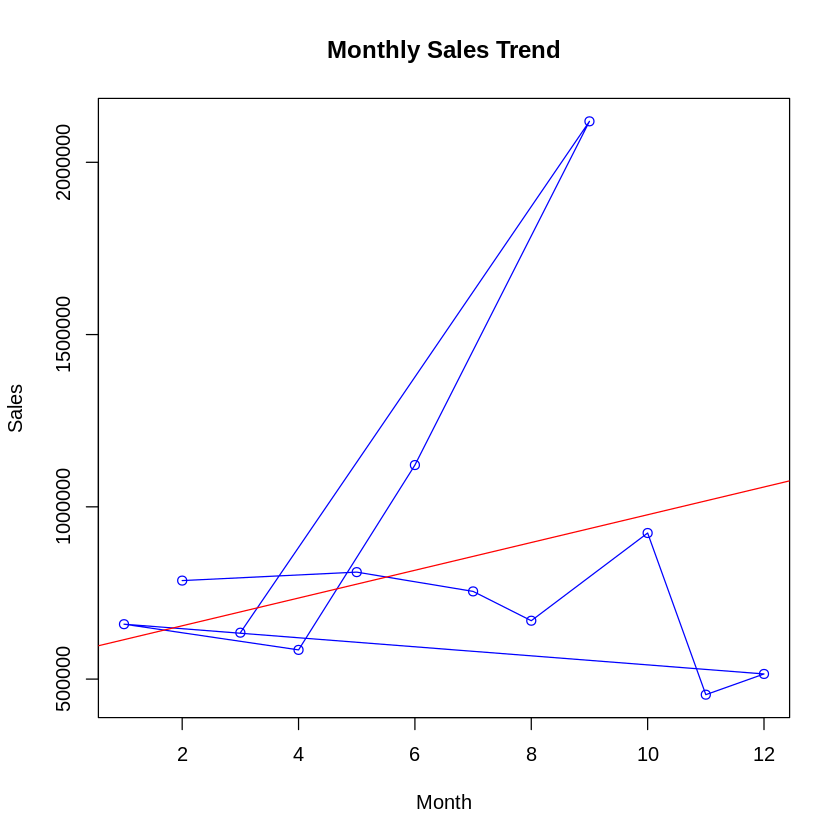

Predicted Sales for Future Months:
  Month Predicted_Sales
1    13         1097931
2    14         1138220
3    15         1178509
4    16         1218798
5    17         1259086
6    18         1299375


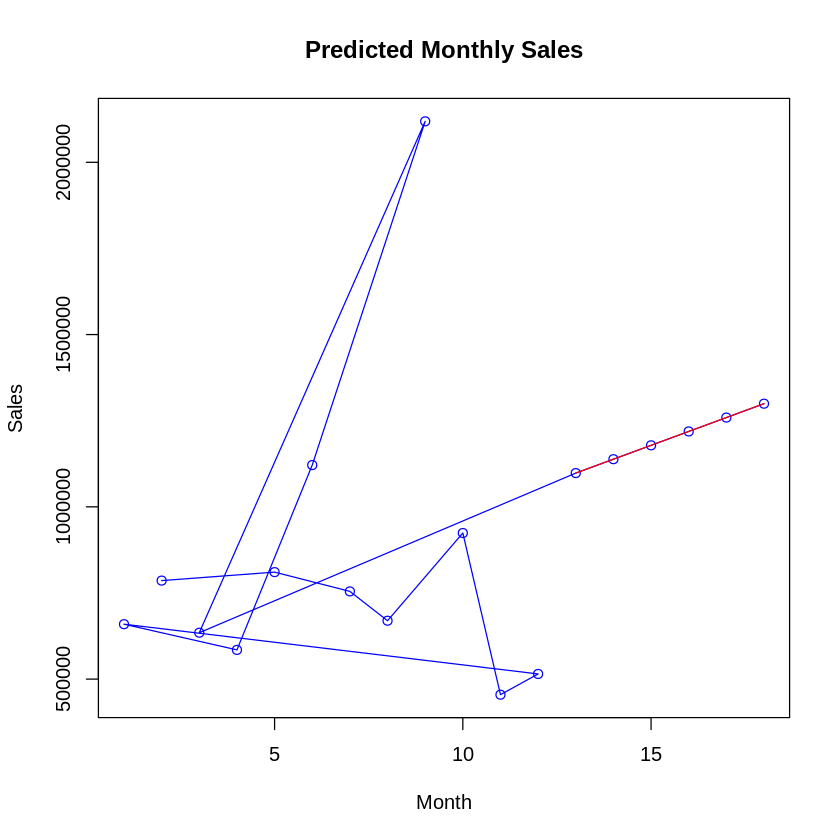

In [18]:
data <- read.csv("/content/sales_data_sample.csv", header = TRUE)

if (!("SALES" %in% names(data)) || !("MONTH_ID" %in% names(data))) {
  stop("One or more required variables (SALES or MONTH_ID) not found in the dataset.")
}

months <- unique(data$MONTH_ID)
sales <- tapply(data$SALES, data$MONTH_ID, sum) # "tapply()" function in R applies a function to subsets of a vector, with the subsets defined by another vector. it performs operations like sum, mean..

# Plot monthly sales trend
plot(months, sales, type = "o", col = "blue", xlab = "Month", ylab = "Sales", main = "Monthly Sales Trend")

month_numeric <- 1:length(months)
model <- lm(sales ~ month_numeric)

# Add regression line
abline(model, col = "red")

# Display regression summary
summary(model)

future_months <- 6
future_month_numeric <- seq(max(month_numeric) + 1, max(month_numeric) + future_months)
future_sales <- predict(model, newdata = data.frame(month_numeric = future_month_numeric))

# Plot predicted monthly sales
plot(c(months, future_month_numeric), c(sales, future_sales), type = "o", col = "blue",
     xlab = "Month", ylab = "Sales", main = "Predicted Monthly Sales")

# Add predicted values line
lines(future_month_numeric, future_sales, col = "red")

cat("Predicted Sales for Future Months:\n")
print(data.frame(Month = future_month_numeric, Predicted_Sales = future_sales))



EX: 7 - Predictive Analysis on health care dataset

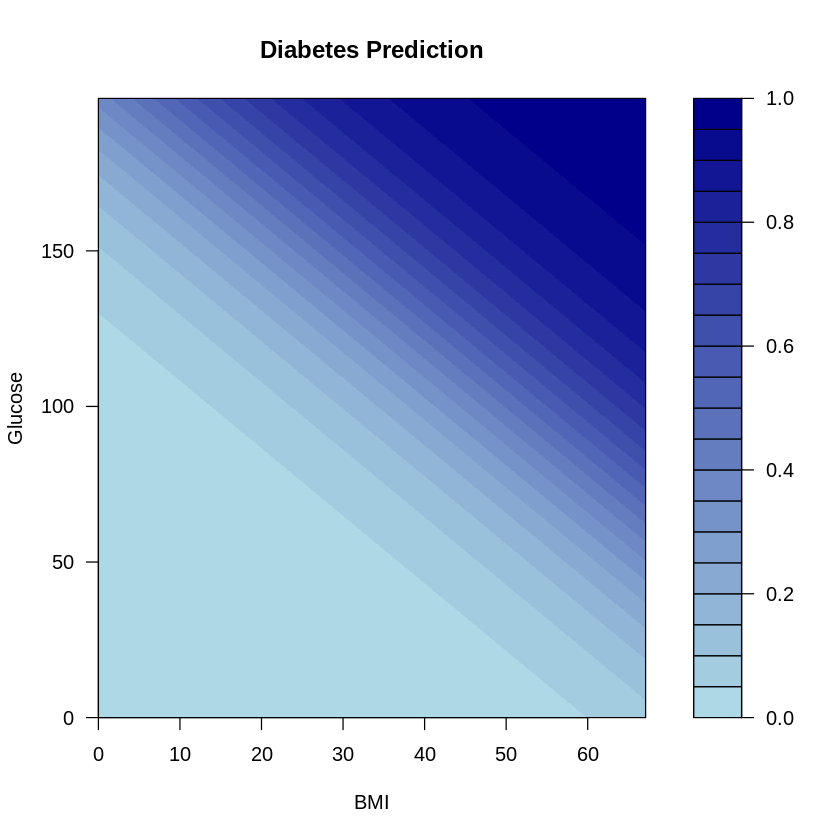

In [ ]:
# Read the data
diabetes_data <- read.csv("/content/diabetes.csv")


# Prepare the data for the model
X <- diabetes_data[, c("BMI", "Glucose")]
y <- diabetes_data$Outcome

# Fit the logistic regression model
model <- glm(Outcome ~ BMI + Glucose, family = binomial(link = "logit"), data = diabetes_data)

# Create a grid for BMI and Glucose values
bmi_values <- seq(min(diabetes_data$BMI), max(diabetes_data$BMI), length.out = 100)
glucose_values <- seq(min(diabetes_data$Glucose), max(diabetes_data$Glucose), length.out = 100)
grid <- expand.grid(BMI = bmi_values, Glucose = glucose_values)

# Make predictions on the grid
predictions_grid <- predict(model, newdata = grid, type = "response")

# Convert predictions to matrix form for plotting
predictions_matrix <- matrix(predictions_grid, nrow = length(bmi_values), ncol = length(glucose_values))

# Plot the contour plot
filled.contour(bmi_values, glucose_values, predictions_matrix,
               color.palette = colorRampPalette(c("lightblue", "darkblue")),
               main = "Diabetes Prediction",
               xlab = "BMI",
               ylab = "Glucose")

EX: 6 - Trend Analysis Through Regression

(similar part like ex:8)


Call:
lm(formula = sales ~ month_numeric)

Residuals:
    Min      1Q  Median      3Q     Max 
-422963 -344003   -3239  150188 1101533 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)     574174     269939   2.127   0.0593 .
month_numeric    40289      36678   1.098   0.2977  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 438600 on 10 degrees of freedom
Multiple R-squared:  0.1077,	Adjusted R-squared:  0.01844 
F-statistic: 1.207 on 1 and 10 DF,  p-value: 0.2977


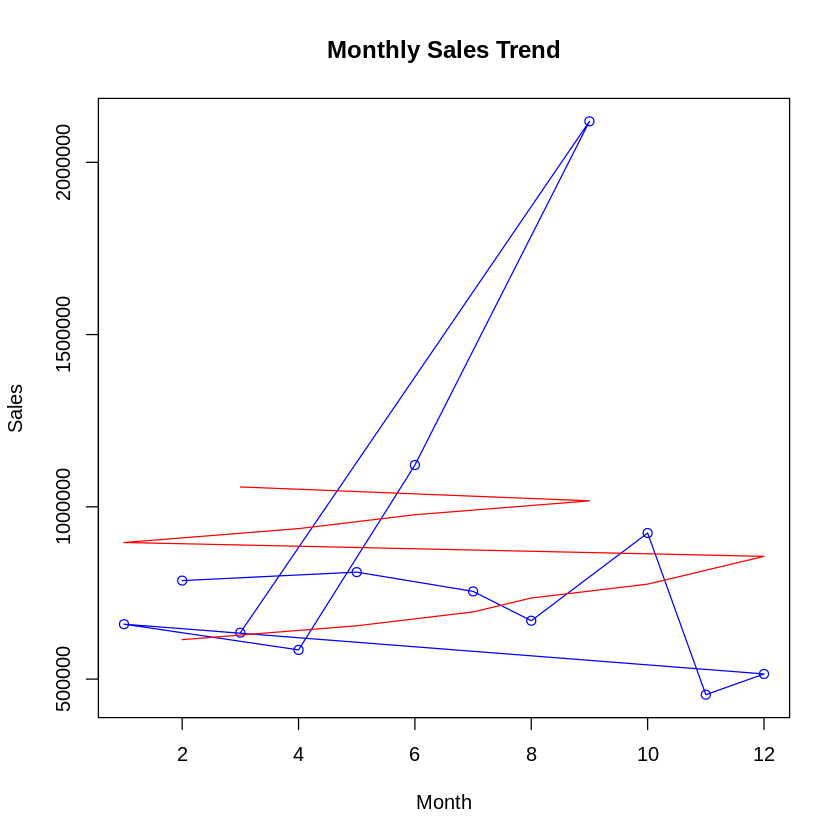

In [ ]:
data <- read.csv("/content/sales_data_sample.csv", header = TRUE)

if (!("SALES" %in% names(data)) || !("MONTH_ID" %in% names(data))) {
  stop("One or more required variables (SALES or MONTH_ID) not found in the dataset.")
}

months <- unique(data$MONTH_ID)
sales <- tapply(data$SALES, data$MONTH_ID, sum)

plot(months, sales, type = "o", col = "blue", xlab = "Month", ylab = "Sales", main = "Monthly Sales Trend")

month_numeric <- 1:length(months)
model <- lm(sales ~ month_numeric)

lines(months, predict(model), col = "red")

summary(model)


EX: 5 - Correlation analysis

for spearman correlation analysis just change the method as "spearman"

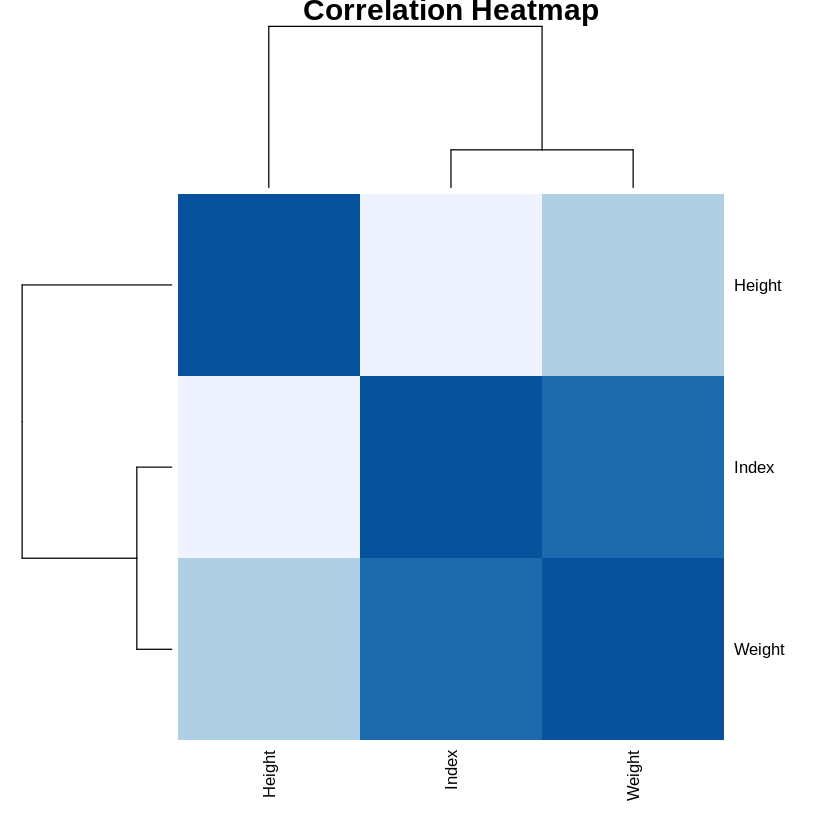

In [ ]:
data <- read.csv("/content/bmi.csv", header = TRUE)

# Check for missing values
if (anyNA(data)) {
  # Remove missing values
  data <- na.omit(data)
}

data_numeric <- data[, sapply(data, is.numeric)]
correlation_matrix <- cor(data_numeric, method = "pearson")

heatmap(correlation_matrix,
        col = colorRampPalette(c("#EFF3FF", "#BDD7E7", "#6BAED6", "#3182BD", "#08519C"))(100),
        scale = "none",
        symm = TRUE,
        main = "Correlation Heatmap",
        cex.axis = 0.8,
        cex.lab = 0.8,
        cexRow = 1,
        cexCol = 1)



EX: 4 - Boxplot


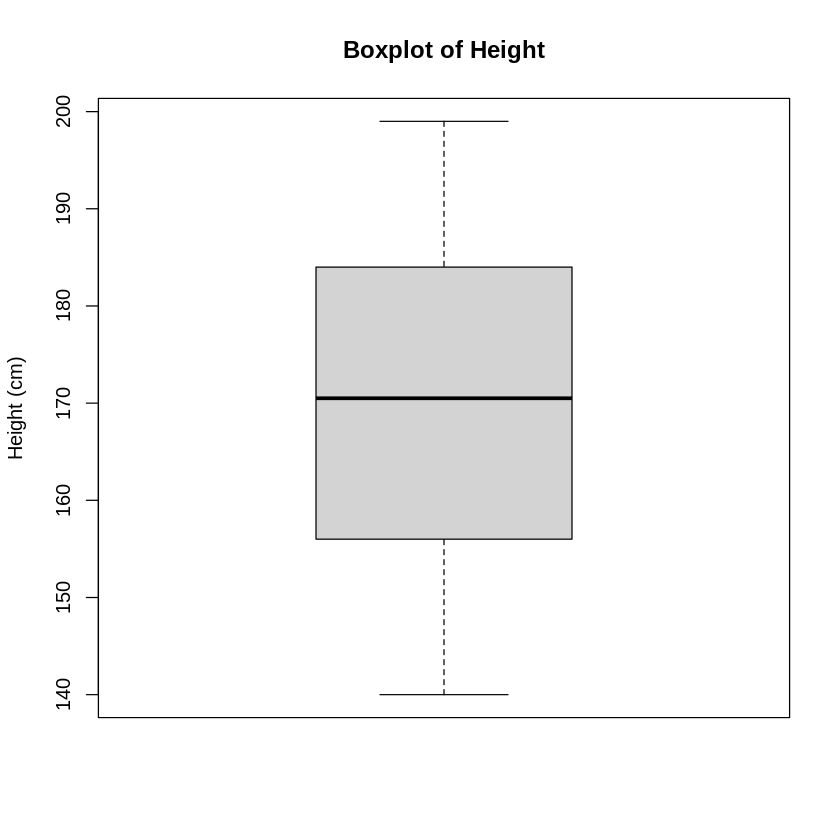

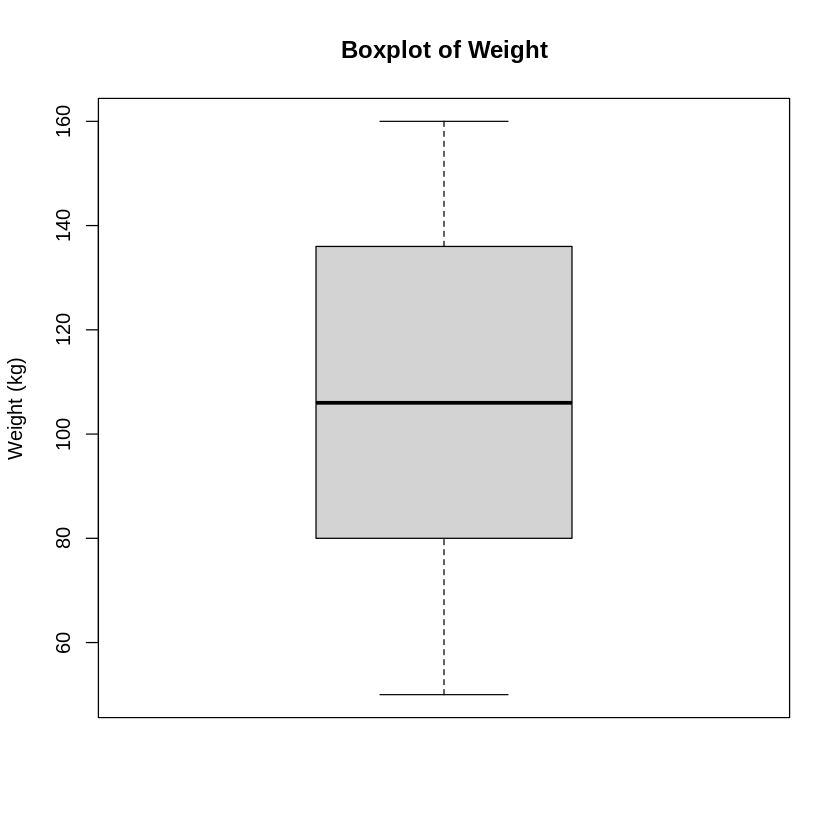

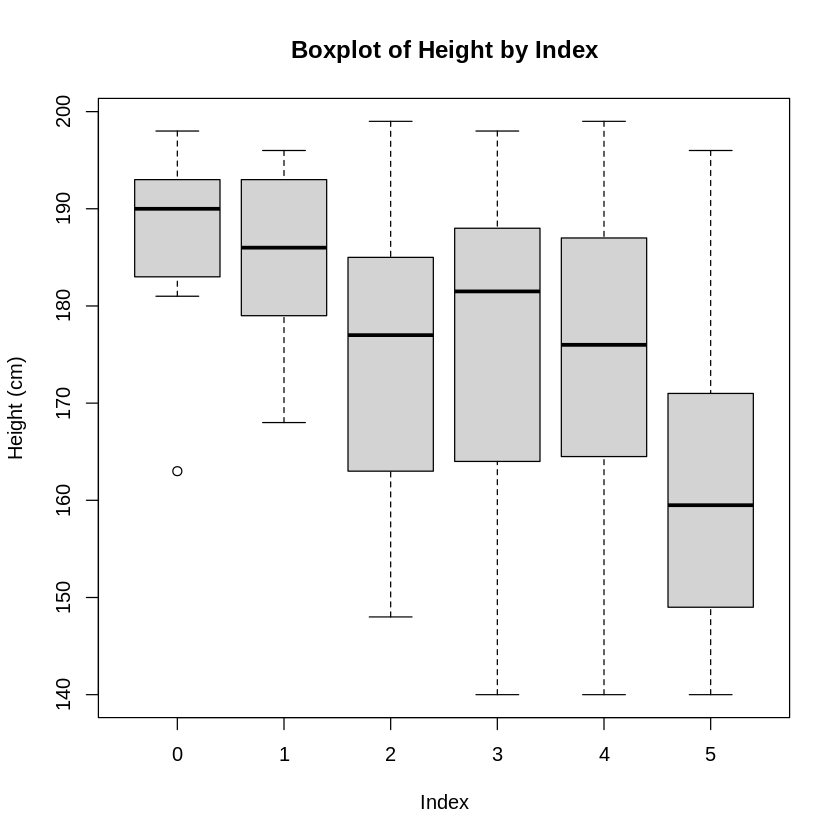

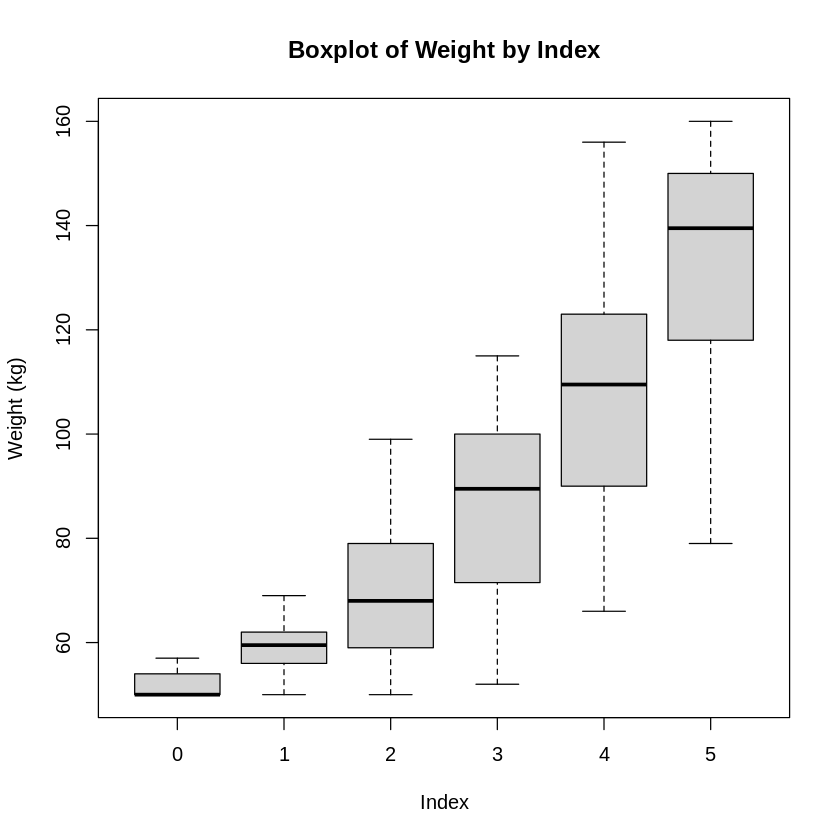

In [ ]:
data <- read.csv("/content/bmi.csv", header = TRUE)
boxplot(data$Height, main = "Boxplot of Height", ylab = "Height (cm)")
boxplot(data$Weight, main = "Boxplot of Weight", ylab = "Weight (kg)")
boxplot(Height ~ Index, data = data, main = "Boxplot of Height by Index", ylab = "Height (cm)")
boxplot(Weight ~ Index, data = data, main = "Boxplot of Weight by Index", ylab = "Weight (kg)")



EX: 3 - Preprocessing

In [ ]:
data <- read.csv("/content/bmi.csv", header = TRUE)

# Check for missing values
missing_values <- anyNA(data)
if (missing_values) {
  cat("There are missing values in the data.\n")
  data <- na.omit(data)
} else {
  cat("There are no missing values in the data.\n")
}

# Write preprocessed data to a new CSV file
write.csv(data, "preprocessed_bmi.csv", row.names = FALSE)

# Summary statistics
cat("Summary Statistics:\n")
summary(data)

# Data dimensions
cat("\nDimensions of the dataset:\n")
cat(paste("Number of rows:", nrow(data), "\n"))
cat(paste("Number of columns:", ncol(data), "\n"))

# Structure of the dataset
cat("\nStructure of the dataset:\n")
str(data)

There are missing values in the data.
Summary Statistics:


    Gender              Height          Weight        Index      
 Length:498         Min.   :140.0   Min.   : 50   Min.   :0.000  
 Class :character   1st Qu.:156.0   1st Qu.: 80   1st Qu.:3.000  
 Mode  :character   Median :170.0   Median :106   Median :4.000  
                    Mean   :169.9   Mean   :106   Mean   :3.747  
                    3rd Qu.:184.0   3rd Qu.:136   3rd Qu.:5.000  
                    Max.   :199.0   Max.   :160   Max.   :5.000  


Dimensions of the dataset:
Number of rows: 498 
Number of columns: 4 

Structure of the dataset:
'data.frame':	498 obs. of  4 variables:
 $ Gender: chr  "Male" "Female" "Male" "Male" ...
 $ Height: int  189 195 149 189 147 154 174 169 195 159 ...
 $ Weight: int  87 104 61 104 92 111 90 103 81 80 ...
 $ Index : int  2 3 3 3 5 5 3 4 2 4 ...
 - attr(*, "na.action")= 'omit' Named int [1:2] 1 3
  ..- attr(*, "names")= chr [1:2] "1" "3"
